In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [2]:
fao_data = pd.read_csv("~/Documents/Kaleb-Bsc thesis/Crop yield and soil/datasets/latest0705.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Plant Growth Regulators-1,Plant Growth Regulators-2,Rodenticides – Other-1,Rodenticides – Other-2,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,0.0,0.0,0.0,Mixed grain,-5.8863,0.0,0.0,0.0,0.0,0.0,...,0.0,144.0,0.0,6.0,0.0,-84.0,0.0,4.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Oats,0.8941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Rye,0.9290,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Triticale,0.4421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1


In [3]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals'],
      dtype=object)

Index(['Autumn', 'Spring', 'Summer'], dtype='object')
            0
0   19.628343
1    4.373406
2   12.354056
3    3.178175
4   10.555150
5    6.777454
6    8.513380
7   11.952761
8    6.618540
9   11.149989
10   6.470301
11   3.198726
12  26.526932
13   8.726829
14  11.980226
15   8.682262
16  15.870015
17   6.084501
18  20.687060
19   8.272470
20   5.584350
21   9.657413
22   9.461157
23  13.011806
24  14.670176
25  12.054231
26   8.636336
27  21.775525
28   7.915809
29  20.844780
30   7.885204
31   5.611470
32  15.908959
33   6.717463
34  12.694866
35  12.883325
36  13.160229
37   8.507732
38  11.515872
39   7.780332
40  21.302536
41   8.108240
42   5.465145
43  15.562128
44   6.350493
Intercept 9.781812125386129
Prediction_local [10.80767873]
Right: 6.350492800000009


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Summer <= 0.00,-2.110062
1,0.17 < Yield(tonnes/ha)-1 <= 0.28,-1.719033
2,Herbicides – Urea derivates <= 0.51,1.384624
3,Autumn <= 0.00,1.013558
4,"Fung & Bact – Triazoles, diazoles-2 <= 0.50",-0.885516
5,Herbicides – Phenoxy hormone products-1 <= 0.52,0.740610
6,Herbicides – Other-1 <= 0.49,0.726316
7,Herbicides – Phenoxy hormone products <= 0.52,0.653925
8,Insecticides – Other-2 <= 0.39,0.636400
9,Herbicides – Bipiridils <= 0.51,0.585045


Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object')
             0
0    27.463939
1    24.809100
2    57.873403
3   206.665987
4     8.254044
..         ...
62   42.744829
63   29.887686
64   22.269480
65   33.560806
66  167.700333

[67 rows x 1 columns]
Intercept 18.558319829519128
Prediction_local [102.35788709]
Right: 167.70033319999973


,Features_Vegetables and Legumes,Coeffcients (RandomForest)_Vegetables and Legumes
0,Summer > 0.00,72.481216
1,Yield(tonnes/ha)-1 > 0.38,6.623424
2,0.04 < Yield(tonnes/ha)-2 <= 0.21,4.510998
3,Fung & Bact – Dithiocarbamates-2 <= 0.51,-4.312988
4,Fall <= 0.00,-3.104155
5,"Fung & Bact – Triazoles, diazoles-2 <= 0.50",2.948559
6,Fung & Bact – Benzimidazoles-2 <= 0.51,-2.923555
7,Mineral Oils-2 <= 0.50,2.917048
8,Herbicides – Amides-2 <= 0.49,2.448003
9,Nutrient nitrogen N (total) - tonnes <= 0.51,2.211018


Index(['Autumn', 'Spring'], dtype='object')
           0
0   1.373489
1  -1.349576
2   2.653451
3  -4.000794
4   0.228951
5   0.460836
6   0.988270
7   0.593606
8  -0.849598
9   2.073177
10 -2.906092
11  0.163452
12  0.569219
13  1.584371
14  1.585631
15 -1.016169
16  2.980859
17 -5.294621
18  0.436562
19  0.630510
20  1.407883
21  1.309569
Intercept 0.10157075800519594
Prediction_local [1.66788601]
Right: 1.3095686000000002


,Features_Cereals,Coeffcients (RandomForest)_Cereals
0,0.55 < Yield(tonnes/ha)-1 <= 0.65,1.332594
1,Spring <= 0.00,0.485842
2,Herbicides – Other-1 <= 0.49,-0.458498
3,Fung & Bact – Other-1 <= 0.50,-0.309544
4,Herbicides – Phenoxy hormone products-1 <= 0.53,0.273487
5,Herbicides – Phenoxy hormone products-2 <= 0.53,-0.269939
6,Herbicides – Carbamates <= 0.51,0.256268
7,0.55 < Yield(tonnes/ha)-2 <= 0.65,0.238053
8,Insecticides – Pyrethroids <= 0.50,0.191410
9,Herbicides – Bipiridils-1 <= 0.51,-0.173356


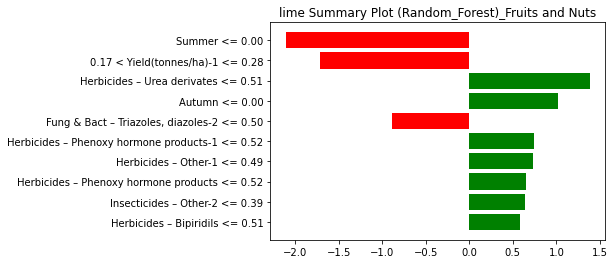

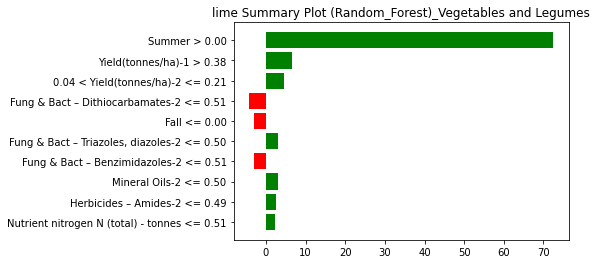

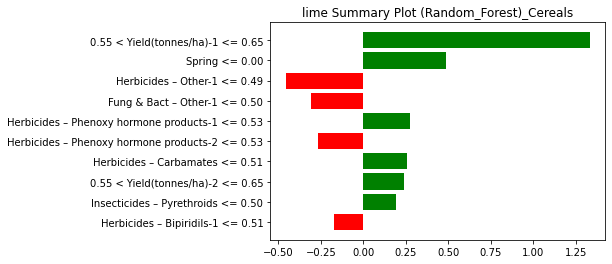

In [5]:
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    encoded_df = encoded_df.drop(encoded_df.columns[-1], axis=1)
    print(encoded_df.columns)

    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    

    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)

    x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
    regressor.fit(x_train, y_train)
    #prediction of new value
    y_pred = regressor.predict(x_test)
    print(pd.DataFrame(y_pred))
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))

    
#     # create a table for Lime results
#     table = doc.add_table(rows=1, cols=2)
#     hdr_cells = table.rows[0].cells
#     hdr_cells[0].text = 'Features_' + cat
#     hdr_cells[1].text = 'Coefficients (RandomForest)_' + cat
    
#     for feature, coefficient in exp.as_list():
#         row_cells = table.add_row().cells
#         row_cells[0].text = str(feature)
#         row_cells[1].text = str(coefficient)

#     # add a page break
#     doc.add_page_break()

# # save the Word document
# doc.save('lime_results_random_forest.docx')
   

    
   


In [5]:
fao_data.iloc[-1]

Nutrient nitrogen N (total) - tonnes                   0.0
Nutrient phosphate P2O5 (total) - tonnes               0.0
Nutrient potash K2O (total) - tonnes                   0.0
Item                                        Sunflower seed
Yield(tonnes/ha)                                   -0.6208
                                                 ...      
Herbicides – Sulfonyl ureas-2                          0.0
Herbicides – Sulfonyl ureas-3                          4.0
Rodenticides – Anti-coagulants-1                       0.1
Rodenticides – Anti-coagulants-2                       0.1
Rodenticides – Anti-coagulants-3                       0.1
Name: 2020-01-01, Length: 115, dtype: object